DATA PREPROCESSING TOOLS


Step 1: Importing Liberaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2: Importing the dataset

In [ ]:
dataset = pd.read_csv('data_table.csv')
x = dataset.iloc[:,:-1].values     # Independent variable vector
y = dataset.iloc[:,-1].values      # Dependent variable vector

In [ ]:
print(x)

[['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 58000]
 ['France' 35 58000]
 ['Spain' 27 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


Step 3: Taking Care of Missing Data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

Step 4: Encoding Categorical Data

i. Encoding the Independent variables

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 58000.0]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 27.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


ii. Encoding the dependent Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


Step 5: Splitting of Dataset Into Training And Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)


In [ ]:
print(x_train)

[[0.0 1.0 0.0 40.0 58000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 1.0 27.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 50.0 83000.0]]


In [ ]:
print(y_train)

[1 1 1 0 1 0 0 1]


In [ ]:
print(y_test)

[0 0]


Step 6: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:]=sc.fit_transform(x_train[:,3:])
x_test[:, 3:]=sc.transform(x_test[:, 3:])

REGRESSION

1. Simple Linear Regression

Step 1: Importing Liberaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2: Importing the Dataset

In [ ]:
dataset = pd.read_csv('YearsExperience_Salary.csv')
x = dataset.iloc[:,:-1].values     # Independent variable vector
y = dataset.iloc[:,-1].values      # Dependent variable vector

Step 3: Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Step 4: Training the Simple Linear Regression Model on Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Step 5: Predicting the Test Set Result

In [ ]:
y_pred = regressor.predict(x_test)

Step 6: Visualising the Training Set Results

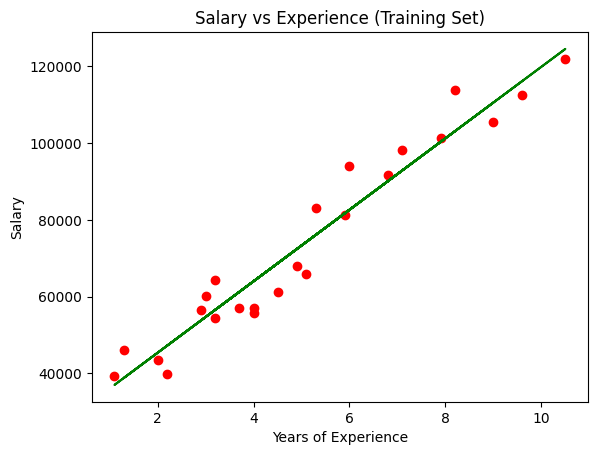

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Step 7: Visualising the Test Set Result

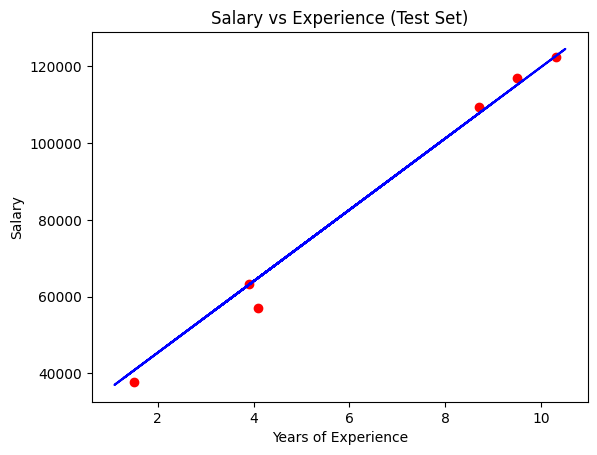

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

2. Multiple Linear Regression

Step 1: Importing Liberaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2: Importing the Dataset

In [ ]:
dataset = pd.read_csv('50_Startups_Dataset.csv')
x = dataset.iloc[:,:-1].values     # Independent variable vector
y = dataset.iloc[:,-1].values      # Dependent variable vector

In [ ]:
print(x)

[[129688.23 74421.72 12755.45 'New York']
 [9877.1 55140.84 182973.24 'New York']
 [58630.72 62037.34 173610.49 'Florida']
 [48526.09 142398.55 138872.88 'Florida']
 [148611.89 107764.25 74038.05 'New York']
 [136956.4 103095.72 163830.83 'Florida']
 [178975.02 50536.64 36772.52 'California']
 [21953.07 117495.22 114343.66 'California']
 [87274.75 49608.3 118893.69 'California']
 [10810.46 75534.65 238915.82 'California']
 [47634.41 148742.8 220204.71 'Florida']
 [103544.28 106799.97 73213.37 'California']
 [10174.51 96833.97 130140.67 'New York']
 [43773.34 112153.71 52876.45 'New York']
 [131727.47 131142.23 229030.68 'California']
 [111263.59 123119.99 218924.46 'New York']
 [47985.92 57485.77 81626.75 'California']
 [119906.81 33852.03 163347.88 'California']
 [162838.94 67854.37 156152.85 'California']
 [6267.26 62128.91 46681.42 'New York']
 [162134.75 55317.94 193002.59 'New York']
 [141137.18 143149.17 139450.97 'California']
 [71348.85 135164.12 196870.35 'California']
 [35318

Step 3: Encoding Categorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[0.0 0.0 1.0 129688.23 74421.72 12755.45]
 [0.0 0.0 1.0 9877.1 55140.84 182973.24]
 [0.0 1.0 0.0 58630.72 62037.34 173610.49]
 [0.0 1.0 0.0 48526.09 142398.55 138872.88]
 [0.0 0.0 1.0 148611.89 107764.25 74038.05]
 [0.0 1.0 0.0 136956.4 103095.72 163830.83]
 [1.0 0.0 0.0 178975.02 50536.64 36772.52]
 [1.0 0.0 0.0 21953.07 117495.22 114343.66]
 [1.0 0.0 0.0 87274.75 49608.3 118893.69]
 [1.0 0.0 0.0 10810.46 75534.65 238915.82]
 [0.0 1.0 0.0 47634.41 148742.8 220204.71]
 [1.0 0.0 0.0 103544.28 106799.97 73213.37]
 [0.0 0.0 1.0 10174.51 96833.97 130140.67]
 [0.0 0.0 1.0 43773.34 112153.71 52876.45]
 [1.0 0.0 0.0 131727.47 131142.23 229030.68]
 [0.0 0.0 1.0 111263.59 123119.99 218924.46]
 [1.0 0.0 0.0 47985.92 57485.77 81626.75]
 [1.0 0.0 0.0 119906.81 33852.03 163347.88]
 [1.0 0.0 0.0 162838.94 67854.37 156152.85]
 [0.0 0.0 1.0 6267.26 62128.91 46681.42]
 [0.0 0.0 1.0 162134.75 55317.94 193002.59]
 [1.0 0.0 0.0 141137.18 143149.17 139450.97]
 [1.0 0.0 0.0 71348.85 135164.12 196870.35]
 [

Step 4: Training the Simple Linear Regression Model on Training Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Step 5: Training the Multiple Linear Regression model on Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Step 6: Predecting the Test Set Result

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[166576.66  36417.91]
 [169965.73 138126.86]
 [201975.52 145611.79]
 [171701.73 291238.62]
 [152728.33 208542.07]
 [212743.42 132291.28]
 [137206.18 221154.32]
 [122458.47  94256.86]
 [205132.33 279382.76]
 [189325.51  47557.  ]]


3. Polynomial Linear Regression

Step 1: Importing Liberaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2: Importing the Dataset

In [2]:
dataset = pd.read_csv('Position_Salary_Data.csv')
x = dataset.iloc[:,1:-1].values     # Independent variable vector
y = dataset.iloc[:,-1].values      # Dependent variable vector

Step 3: Training the Linear Regression Model on the Whole Dataset

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

Step 4: Training the  Polynomial Linear Regression Model on the Whole Dataset

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression()

Step 5: Visualising The Linear Regression Results

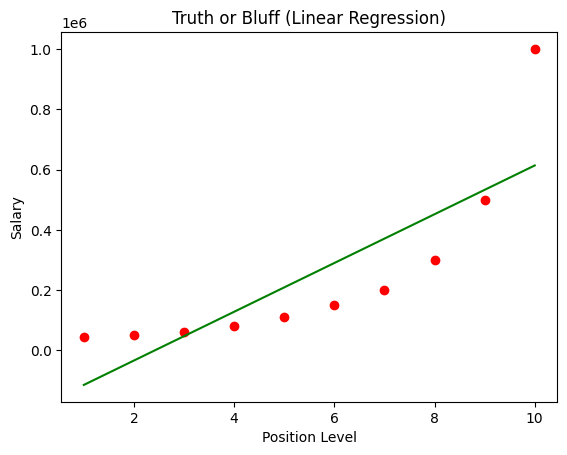

In [11]:
plt.scatter(x,y, color = 'red')
plt.plot(x,lin_reg.predict(x), color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Step 6: Visualising the Polynomial Regression Result

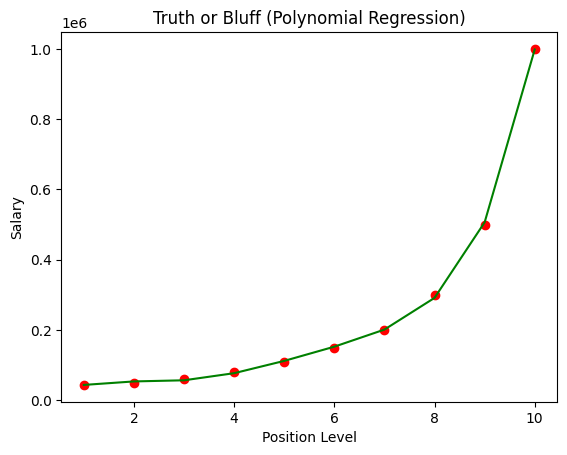

In [14]:
plt.scatter(x,y, color = 'red')
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Step 7: Visualising the Polynomial Regression Result - for Smooth Curve

<ipython-input-16-b7d6dfe135a0>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x), 0.1)


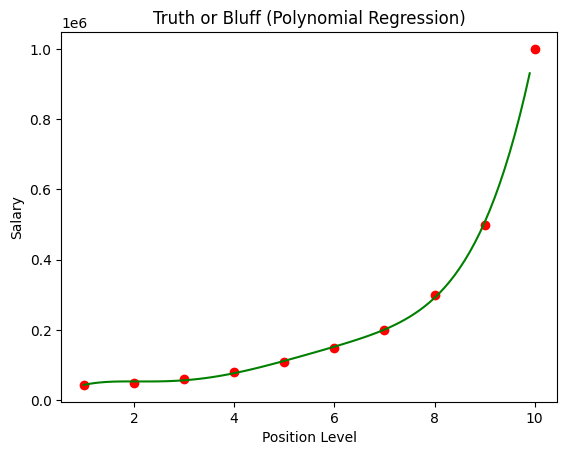

In [16]:
x_grid = np.arange(min(x),max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y, color = 'red')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Step 8: Predecting new Result with Linear Regression

In [17]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Step 9: Predecting a new Result with Polynomial Regression

In [20]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765173])

4. Support Vector Regression

Step 1: Import Liberaries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2: Importing the Dataset

In [22]:
dataset = pd.read_csv('Position_Salary_Data.csv')
x = dataset.iloc[:,1:-1].values     # Independent variable vector
y = dataset.iloc[:,-1].values      # Dependent variable vector

In [23]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [24]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Step 3: Feature Scaling

In [25]:
y = y.reshape(len(y),1)    # reshaping Y into single column


In [26]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [27]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y =  StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [28]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [29]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Step 4: Training the SVR model on whole dataset

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Step 5: Predicting a new Result

In [31]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Step 6: Visualise the SVR results

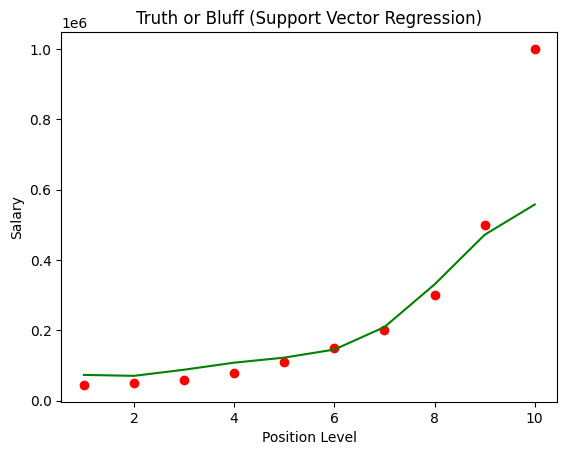

In [33]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

5. Decision Tree Regression

Step 1: Impoet Liberaries

Step 2: Import Dataset

Step 3: Training the Decision Tree Regression model on the whole dataset

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor =  DecisionTreeRegressor(random_state=0)
regressor.fit(x,y)

DecisionTreeRegressor(random_state=0)

Step 4: Predicting the new Result

In [36]:
regressor.predict([[6.5]])

array([2.64250325])

Step 5: Visualisation of the Result

<ipython-input-37-097916e0229f>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x), 0.1)


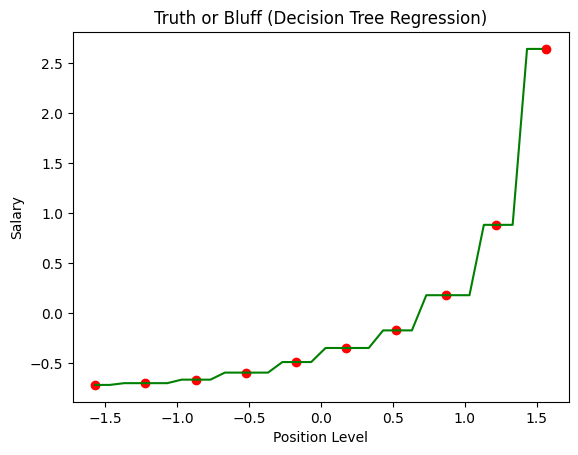

In [37]:
x_grid = np.arange(min(x),max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y, color = 'red')
plt.plot(x_grid,regressor.predict(x_grid), color = 'green')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()